antoine.roux

# Activité 6 - Transpiler un modèle en C : régression linéaire

### Imports

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os

### Load and prepare dataset

In [63]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

### Create and train linear regression model

In [64]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

### Predict and evaluate

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


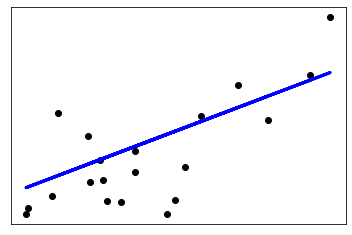

In [65]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Save regression model

In [66]:
joblib.dump(regr, f"regr.joblib");

### Load model

In [67]:
model = joblib.load(f'regr.joblib')

### Transpiling

In [68]:
model = joblib.load(f'regr.joblib')

# Thetas
thetas = f"{model.intercept_}f, " + "".join([str(coef) + "f, " for coef in model.coef_])[:-2]

# Features
X = diabetes_X_test
features = "".join(["{" + ", ".join([str(value) for value in row]) + "}, " for row in X])[:-1]

In [69]:
code = f"""#include <stdio.h>

float predict(float *features, float* thetas)
{{
    float res = thetas[0];
    for (int i = 0; i < {len(model.coef_)}; i++)
        res += features[i] * thetas[i + 1];
    return res;
}}

int main(int argc, char *arvgv[])
{{
    float features[{X.shape[0]}][{X.shape[1]}] = {{{features}}};
    float thetas[{len(model.coef_) + 1}] = {{{thetas}}};

    for (int i = 0; i < {X.shape[0]}; i++)
        printf("%f\\n", predict(features[i], thetas));
    
    return 0;
}}

"""

with open("regr.c", "w+") as f:
    f.write(code)

print(code)

#include <stdio.h>

float predict(float *features, float* thetas)
{
    float res = thetas[0];
    for (int i = 0; i < 1; i++)
        res += features[i] * thetas[i + 1];
    return res;
}

int main(int argc, char *arvgv[])
{
    float features[20][1] = {{0.077863387626902}, {-0.0396181284261162}, {0.0110390390462862}, {-0.0406959404999971}, {-0.0342290680567117}, {0.00564997867688165}, {0.088641508365711}, {-0.0331512559828308}, {-0.0568631216082106}, {-0.030995631835069}, {0.0552293340754031}, {-0.0600965578298533}, {0.00133873038135806}, {-0.0234509473179027}, {-0.074108114790305}, {0.0196615356373334}, {-0.0159062628007364}, {-0.0159062628007364}, {0.0390621529671896}, {-0.0730303027164241},};
    float thetas[2] = {152.91886182616167f, 938.2378612512637f};

    for (int i = 0; i < 20; i++)
        printf("%f\n", predict(features[i], thetas));
    
    return 0;
}




### Compile

In [70]:
! gcc regr.c -O3 -o transpiled_model

### Comparisons

In [71]:
print("C Model (Transpiled):")
! ./transpiled_model

C Model (Transpiled):
225.973236
115.747643
163.276108
114.736397
120.803864
158.219894
236.085693
121.815102
99.567734
123.837593
204.737122
96.534004
154.174911
130.916306
83.387833
171.366058
137.995010
137.995010
189.568451
84.399078


In [72]:
y = regr.predict(X)
print("Original model:")
print("\n".join(map(str, y.tolist())))

Original model:
225.9732401030043
115.74763374486452
163.27610621121843
114.73638964983571
120.80385422000853
158.21988573607436
236.08568105329238
121.81509831503735
99.56772822440365
123.83758650509495
204.7371141073994
96.53399593931724
154.17490935595916
130.9162951702966
83.38782270394276
171.36605897144887
137.9950038354982
137.9950038354982
189.56845268196736
84.39906679897157
